In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"D:\Data_Science & Analytics\DataSets\car_age_price.csv")
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [4]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
#The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. 
# 1.Find the best linear relationship between year and price. 
# 2.Can you predict the possible price of a 2022 model second-hand grand i10?
# 3.Please learn about lasso regression and create a model along with linear regression. 
# 4.Find out which one is performing better.

<Axes: >

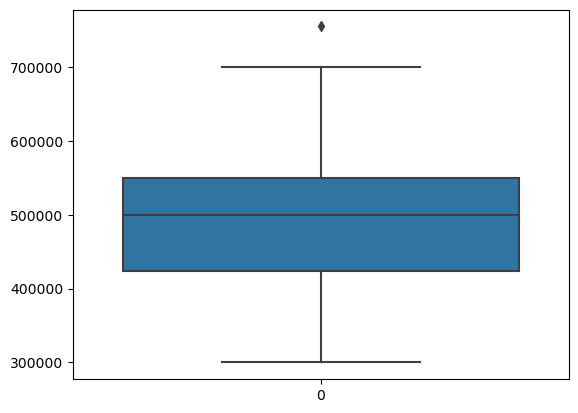

In [7]:
#Checking outliers
sns.boxplot(data['Price'])

<Axes: >

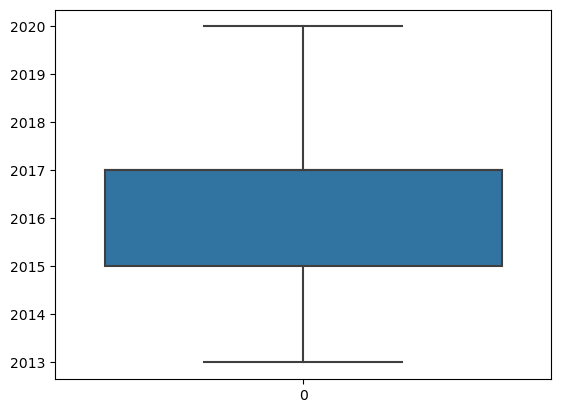

In [8]:
sns.boxplot(data['Year'])

<Axes: >

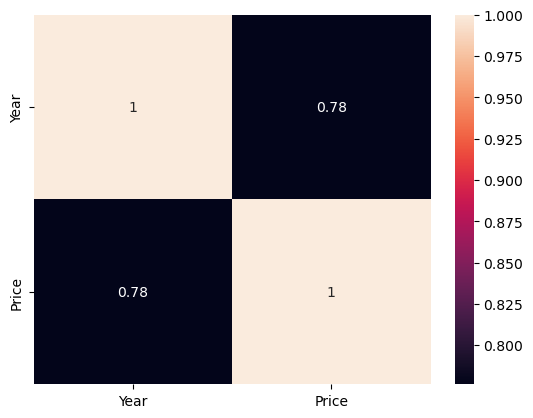

In [9]:
sns.heatmap(data.corr(),annot=True)

In [10]:
#outliers handling

Q3=np.percentile(data['Price'],75,method='midpoint')
Q1=np.percentile(data['Price'],25, method='midpoint')

In [11]:
IQR=Q3-Q1
up_out=Q3+1.5*IQR

In [12]:
outliers=[]
for x in data['Price']:
    if(x>up_out):
        outliers.append(x)
print(outliers)

[755000]


In [13]:
Q3=np.percentile(data['Year'],75,method='midpoint')
Q1=np.percentile(data['Year'],25, method='midpoint')

In [14]:
IQR=Q3-Q1
up_out=Q3+1.5*IQR

In [15]:
outliers=[]
for x in data['Year']:
    if(x>up_out):
        outliers.append(x)
print(outliers)

[]


In [16]:
#In the context of linear regression,the independent varaible(often denoted as X) is the variable that you use to predict the dependent varaible
#In this case,the year is independent variable because you are using it to predict the price of the Hyundai car.

In [17]:
y=data['Price']   #predict  #dependent varaible
X=data.drop(["Price"],axis=1)  #independent variables-->year

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

In [19]:
from sklearn import linear_model
lin_reg=linear_model.LinearRegression()

In [20]:
lin_model=lin_reg.fit(X_train,y_train)

In [21]:
lin_pred=lin_model.predict(X_test)

In [22]:
lin_pred

array([599223.07304102, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304102, 599223.07304102, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304102,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

In [23]:
X_test

,Year
40,2019
65,2017
4,2018
47,2018
42,2018
69,2015
26,2017
11,2018
10,2019
44,2019


In [24]:
from sklearn.metrics import mean_squared_error
print('MSE is :',mean_squared_error(y_test,lin_pred))

MSE is : 3878767151.0731072


In [25]:
from sklearn.metrics import r2_score
print('R2 score is :',r2_score(y_test,lin_pred))

R2 score is : 0.4347961632108521


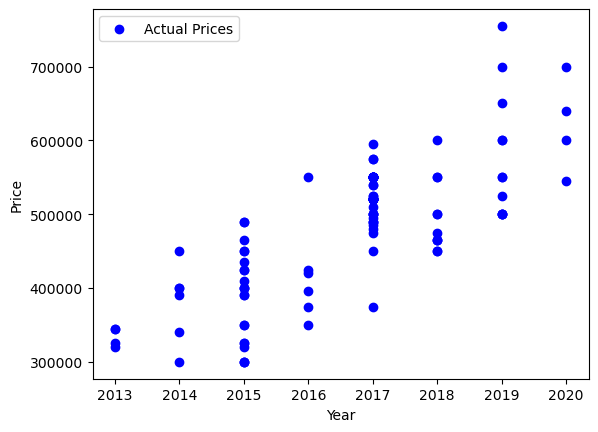

In [26]:
plt.scatter(data['Year'], data['Price'], color='blue', label='Actual Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

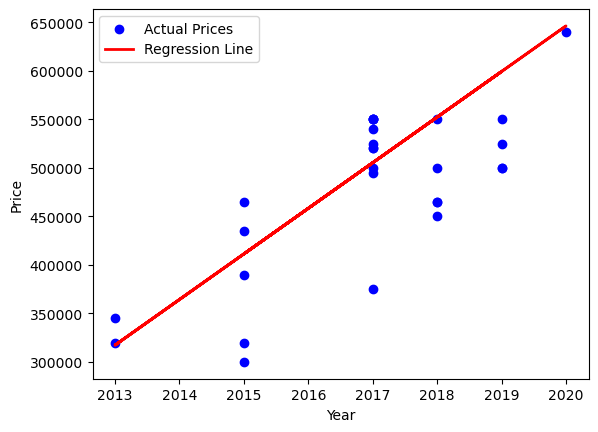

In [27]:
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test,lin_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

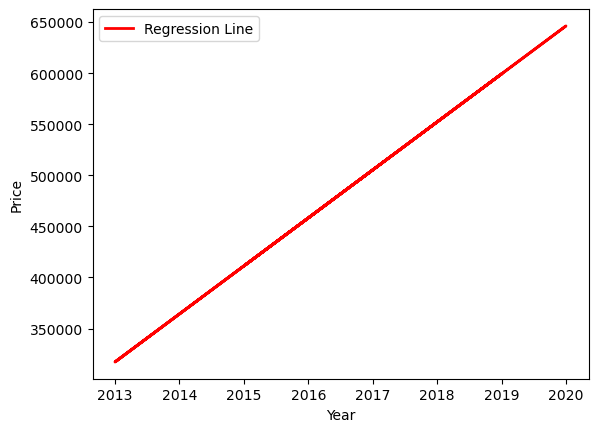

In [28]:
plt.plot(X_test,lin_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
#Predicting for 2022
import warnings
warnings.filterwarnings('ignore')

In [32]:
year_2022=np.array([[2022]])
predicted_price_2022=lin_model.predict(year_2022)
predicted_price_2022

array([740160.11937766])

In [33]:
from sklearn.linear_model import Lasso  #lasso focus on what really matters,and dont sweat the small stuff

In [34]:
lasso_model=Lasso(alpha=0.1)

In [35]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [36]:
lasso_pred=lasso_model.predict(X_test)
lasso_pred

array([599222.97656578, 505265.02551627, 552244.00104102, 552244.00104102,
       552244.00104102, 411307.07446676, 505265.02551627, 552244.00104102,
       599222.97656578, 599222.97656578, 317349.12341726, 505265.02551627,
       411307.07446676, 646201.95209053, 552244.00104102, 599222.97656578,
       317349.12341726, 411307.07446676, 505265.02551627, 505265.02551627,
       505265.02551627, 505265.02551627, 505265.02551627, 505265.02551627,
       505265.02551627, 505265.02551627, 411307.07446676, 411307.07446676])

In [37]:
lasso_mse=mean_squared_error(y_test,lasso_pred)
lasso_mse  

3878764025.5442586

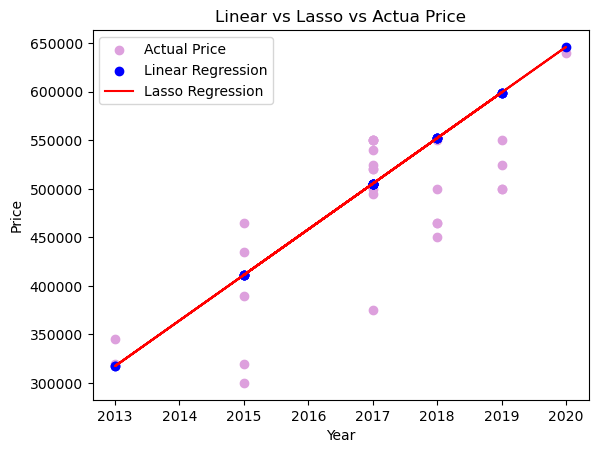

In [38]:
plt.scatter(X_test,y_test,color='plum',label='Actual Price')
plt.scatter(X_test,lin_pred,color='blue',label='Linear Regression')
plt.plot(X_test,lasso_pred,color='red',label='Lasso Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title("Linear vs Lasso vs Actua Price")
plt.legend()
plt.show()